In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [51]:
train_path = r'../preprocessed_data/preprocessed_train.csv'
test_path = r'../preprocessed_data/preprocessed_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


# DATA SPLIT

In [52]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [53]:
X = train_df[feature_names]
y = train_df['price_range']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1021)

# LOGISTIC REGRESSION

In [56]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error, root_mean_squared_error, accuracy_score

In [57]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x, train_y)
logistic_regression_pred = logistic_regression.predict(valid_x)

logistic_regression_acc = accuracy_score(valid_y, logistic_regression_pred)
logistic_regression_mae = mean_absolute_error(valid_y, logistic_regression_pred)
logistic_regression_rmse = root_mean_squared_error(valid_y, logistic_regression_pred)

print(f'''
logistic regression
    ACCURACY : {logistic_regression_acc}
    MAE : {logistic_regression_mae}
    RMSE : {logistic_regression_rmse}
''')


logistic regression
    ACCURACY : 0.9616666666666667
    MAE : 0.03833333333333333
    RMSE : 0.19578900207451216



# TEST DATA

In [58]:
test_x = test_df[feature_names]

In [59]:
test_predict = logistic_regression.predict(test_x)

test_result = test_df[['id']]
test_result['price_range'] = test_predict
test_result

C:\Users\user\AppData\Local\Temp\ipykernel_18968\361242015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_result['price_range'] = test_predict


,id,price_range
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,0
998,999,2


In [60]:
result_save_path = r'../result_data/logistic_regression.csv'
test_result.to_csv(result_save_path, index = False)

# RESULT VISUALIZATION

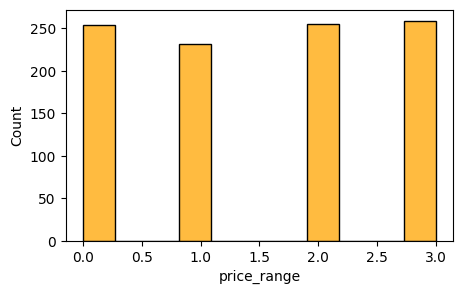

In [61]:
plt.figure(figsize = (5, 3))

sns.histplot(test_result, x = 'price_range', color = 'orange')

plt.show()

In [62]:
test_result['price_range'].value_counts()

price_range
3    259
2    255
0    254
1    232
Name: count, dtype: int64